In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import f1_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

from hyperopt import hp, tpe, Trials, fmin
import numpy as np

In [2]:
data = pd.read_csv('Mobile Classification.csv')


In [3]:
data[['blue', 'dual_sim', 'four_g', 'three_g','touch_screen', 'wifi']] = data[['blue', 'dual_sim', 'four_g','three_g', 'touch_screen', 'wifi']].astype('bool')

In [4]:
x = data.iloc[:,:20]
y = data.iloc[:,-1:]

In [5]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
battery_power    2000 non-null int64
blue             2000 non-null bool
clock_speed      2000 non-null float64
dual_sim         2000 non-null bool
fc               2000 non-null int64
four_g           2000 non-null bool
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null bool
touch_screen     2000 non-null bool
wifi             2000 non-null bool
dtypes: bool(6), float64(2), int64(12)
memory usage: 230.5 KB


In [6]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 1 columns):
price_range    2000 non-null int64
dtypes: int64(1)
memory usage: 15.7 KB


In [10]:
num = list(x.select_dtypes(include=[np.number]))
cat = list(x.select_dtypes(include=['bool']))
num
cat

[]

In [11]:
scaler = StandardScaler()
x[['battery_power', 'clock_speed',  'fc',  'int_memory',  'm_dep',  'mobile_wt', 
   'n_cores',  'pc',  'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']]= scaler.fit_transform(x[['battery_power',
 'clock_speed',
 'fc',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time']])


In [12]:
for i in cat:
    x[i] = LabelEncoder().fit_transform(x[i])

In [13]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
battery_power    2000 non-null float64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null float64
four_g           2000 non-null int64
int_memory       2000 non-null float64
m_dep            2000 non-null float64
mobile_wt        2000 non-null float64
n_cores          2000 non-null float64
pc               2000 non-null float64
px_height        2000 non-null float64
px_width         2000 non-null float64
ram              2000 non-null float64
sc_h             2000 non-null float64
sc_w             2000 non-null float64
talk_time        2000 non-null float64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
dtypes: float64(14), int64(6)
memory usage: 312.6 KB


In [ ]:
y[y['price_range'] = 0] = 'A'

y['price_range'].value_counts()


In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [17]:
DT= DecisionTreeClassifier(max_depth =1)
svc = SVC(probability=True)
gb = GaussianNB()

In [ ]:
bc1 = AdaBoostClassifier(random_state =8)
space1 = {'n_estimators':  [200,800], 
        'learning_rate': [0.1,0.2,0.3, 0.4,0.5,0.6],
         'base_estimator':[svc,gb,DT]}
rs = RandomizedSearchCV(estimator = bc1, param_distributions = space1, n_iter=61,
                                   scoring='f1_macro',
                                   cv=3, 
                                   verbose=1, random_state=8)

rs.fit(x_train, y_train)

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 36 is smaller than n_iter=61. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kalya\Anaconda3\lib\site-packag

In [14]:

rs.best_params_
bcc = rs.best_estimator_
rs.best_score_

0.4808274214690445

In [15]:
bcc.fit(x_train,y_train)


C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.5,
                   n_estimators=235, random_state=8)

[[ 11  89   0   0]
 [  0  82  17   0]
 [  0   8  88   0]
 [  0   0 101   4]]
0.4625
0.5375
[1.         0.45810056 0.42718447 1.        ]
[0.11       0.82828283 0.91666667 0.03809524]
[0.1981982  0.58992806 0.58278146 0.0733945 ]
0.36107555202966035


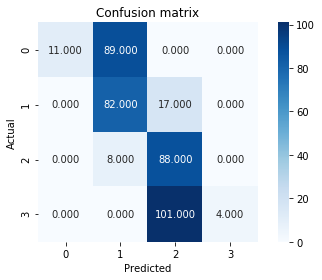

In [16]:
y_pred = bcc.predict(x_test)

# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score
print(metrics.f1_score(y_test, y_pred, average = 'macro')) # F1 score average

In [17]:
y_train.head()

,price_range
1260,0
916,0
532,3
1159,0
1584,0


In [18]:
def objective_func(args):
    n_estimators = args['n_estimators']
   
    learning_rate = args['learning_rate']

 
    clf = AdaBoostClassifier(n_estimators = n_estimators, learning_rate = learning_rate)
    
    
    clf.fit(x_train,y_train)    
    y_pred = clf.predict(x_test)
    f1 = -(f1_score(y_pred,y_test,  average='macro'))
    return f1
space = {'n_estimators':  hp.choice('n_estimators',[200,500,800]), 
        'learning_rate': hp.choice('learning_rate',[0.1, 0.2, 0.3, 0.4, 0.5])}
                                
                                
                                
best_classifier = fmin(objective_func, space, algo=tpe.suggest, max_evals=100)
print(best_classifier)

  0%|          | 0/100 [00:00<?, ?it/s, best loss: ?]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



  1%|          | 1/100 [00:00<01:30,  1.09it/s, best loss: -0.27899803403159107]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



  2%|▏         | 2/100 [00:03<02:27,  1.50s/it, best loss: -0.5803640950495625] 

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



  3%|▎         | 3/100 [00:08<03:48,  2.36s/it, best loss: -0.5803640950495625]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



  4%|▍         | 4/100 [00:12<04:55,  3.08s/it, best loss: -0.5803640950495625]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



  5%|▌         | 5/100 [00:14<04:00,  2.54s/it, best loss: -0.5803640950495625]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



  6%|▌         | 6/100 [00:17<04:08,  2.65s/it, best loss: -0.5803640950495625]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



  7%|▋         | 7/100 [00:18<03:25,  2.21s/it, best loss: -0.5803640950495625]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



  8%|▊         | 8/100 [00:20<03:32,  2.31s/it, best loss: -0.5803640950495625]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



  9%|▉         | 9/100 [00:25<04:32,  3.00s/it, best loss: -0.5803640950495625]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



 10%|█         | 10/100 [00:26<03:38,  2.43s/it, best loss: -0.5803640950495625]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 11%|█         | 11/100 [00:29<03:48,  2.57s/it, best loss: -0.5803640950495625]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



 12%|█▏        | 12/100 [00:33<04:38,  3.17s/it, best loss: -0.5803640950495625]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



 13%|█▎        | 13/100 [00:36<04:21,  3.01s/it, best loss: -0.5803640950495625]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 14%|█▍        | 14/100 [00:37<03:31,  2.46s/it, best loss: -0.5803640950495625]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 15%|█▌        | 15/100 [00:40<03:39,  2.59s/it, best loss: -0.5803640950495625]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



 16%|█▌        | 16/100 [00:45<04:25,  3.17s/it, best loss: -0.5803640950495625]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 17%|█▋        | 17/100 [00:48<04:13,  3.06s/it, best loss: -0.5803640950495625]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 18%|█▊        | 18/100 [00:50<04:05,  3.00s/it, best loss: -0.5803640950495625]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



 19%|█▉        | 19/100 [00:53<03:50,  2.85s/it, best loss: -0.5803640950495625]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 20%|██        | 20/100 [00:54<03:05,  2.32s/it, best loss: -0.5803640950495625]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 21%|██        | 21/100 [00:57<03:16,  2.49s/it, best loss: -0.5803640950495625]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 22%|██▏       | 22/100 [01:00<03:21,  2.59s/it, best loss: -0.5803640950495625]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 23%|██▎       | 23/100 [01:02<03:23,  2.65s/it, best loss: -0.5803640950495625]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 24%|██▍       | 24/100 [01:05<03:23,  2.67s/it, best loss: -0.5803640950495625]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 25%|██▌       | 25/100 [01:08<03:19,  2.66s/it, best loss: -0.5803640950495625]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 26%|██▌       | 26/100 [01:11<03:21,  2.73s/it, best loss: -0.5803640950495625]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 27%|██▋       | 27/100 [01:14<03:21,  2.76s/it, best loss: -0.5803640950495625]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 28%|██▊       | 28/100 [01:16<03:21,  2.80s/it, best loss: -0.5803640950495625]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



 29%|██▉       | 29/100 [01:19<03:19,  2.81s/it, best loss: -0.5803640950495625]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 30%|███       | 30/100 [01:22<03:17,  2.82s/it, best loss: -0.5803640950495625]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



 31%|███       | 31/100 [01:26<03:45,  3.26s/it, best loss: -0.5803640950495625]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 32%|███▏      | 32/100 [01:29<03:34,  3.16s/it, best loss: -0.5803640950495625]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 33%|███▎      | 33/100 [01:30<02:50,  2.55s/it, best loss: -0.5803640950495625]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 34%|███▍      | 34/100 [01:35<03:26,  3.14s/it, best loss: -0.5893861542385821]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 35%|███▌      | 35/100 [01:40<03:52,  3.57s/it, best loss: -0.5893861542385821]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



 36%|███▌      | 36/100 [01:44<04:06,  3.85s/it, best loss: -0.5893861542385821]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 37%|███▋      | 37/100 [01:49<04:17,  4.09s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 38%|███▊      | 38/100 [01:53<04:21,  4.21s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 39%|███▉      | 39/100 [01:57<04:16,  4.20s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



 40%|████      | 40/100 [02:02<04:19,  4.33s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 41%|████      | 41/100 [02:06<04:16,  4.35s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 42%|████▏     | 42/100 [02:11<04:15,  4.40s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 43%|████▎     | 43/100 [02:15<04:09,  4.38s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 44%|████▍     | 44/100 [02:20<04:09,  4.45s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 45%|████▌     | 45/100 [02:24<04:05,  4.47s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



 46%|████▌     | 46/100 [02:29<03:58,  4.41s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



 47%|████▋     | 47/100 [02:30<03:01,  3.42s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 48%|████▊     | 48/100 [02:34<03:15,  3.75s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 49%|████▉     | 49/100 [02:39<03:24,  4.00s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 50%|█████     | 50/100 [02:40<02:36,  3.12s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



 51%|█████     | 51/100 [02:44<02:52,  3.51s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 52%|█████▏    | 52/100 [02:49<03:03,  3.83s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 53%|█████▎    | 53/100 [02:50<02:22,  3.03s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



 54%|█████▍    | 54/100 [02:55<02:39,  3.48s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 55%|█████▌    | 55/100 [02:59<02:48,  3.76s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 56%|█████▌    | 56/100 [03:03<02:50,  3.87s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 57%|█████▋    | 57/100 [03:04<02:08,  2.98s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 58%|█████▊    | 58/100 [03:08<02:15,  3.23s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



 59%|█████▉    | 59/100 [03:12<02:27,  3.61s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



 60%|██████    | 60/100 [03:13<01:54,  2.86s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 61%|██████    | 61/100 [03:18<02:10,  3.34s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 62%|██████▏   | 62/100 [03:22<02:21,  3.71s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 63%|██████▎   | 63/100 [03:27<02:26,  3.95s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 64%|██████▍   | 64/100 [03:28<01:51,  3.10s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 65%|██████▌   | 65/100 [03:32<02:00,  3.44s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 66%|██████▌   | 66/100 [03:37<02:08,  3.78s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 67%|██████▋   | 67/100 [03:41<02:11,  3.99s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 68%|██████▊   | 68/100 [03:45<02:04,  3.90s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 69%|██████▉   | 69/100 [03:49<02:04,  4.02s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 70%|███████   | 70/100 [03:54<02:03,  4.12s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 71%|███████   | 71/100 [03:58<02:04,  4.31s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 72%|███████▏  | 72/100 [04:02<01:55,  4.13s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



 73%|███████▎  | 73/100 [04:06<01:52,  4.17s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 74%|███████▍  | 74/100 [04:11<01:51,  4.28s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 75%|███████▌  | 75/100 [04:15<01:48,  4.33s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 76%|███████▌  | 76/100 [04:19<01:37,  4.07s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



 77%|███████▋  | 77/100 [04:23<01:31,  4.00s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 78%|███████▊  | 78/100 [04:24<01:08,  3.13s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 79%|███████▉  | 79/100 [04:28<01:12,  3.44s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 80%|████████  | 80/100 [04:31<01:05,  3.27s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



 81%|████████  | 81/100 [04:35<01:08,  3.60s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 82%|████████▏ | 82/100 [04:39<01:07,  3.75s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 83%|████████▎ | 83/100 [04:43<01:03,  3.72s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 84%|████████▍ | 84/100 [04:46<00:54,  3.40s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



 85%|████████▌ | 85/100 [04:47<00:40,  2.72s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 86%|████████▌ | 86/100 [04:51<00:44,  3.19s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 87%|████████▋ | 87/100 [04:55<00:46,  3.56s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 88%|████████▊ | 88/100 [05:00<00:46,  3.85s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



 89%|████████▉ | 89/100 [05:03<00:39,  3.56s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 90%|█████████ | 90/100 [05:07<00:38,  3.84s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 91%|█████████ | 91/100 [05:08<00:26,  2.96s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



 92%|█████████▏| 92/100 [05:13<00:27,  3.45s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 93%|█████████▎| 93/100 [05:17<00:26,  3.79s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 94%|█████████▍| 94/100 [05:20<00:20,  3.41s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 95%|█████████▌| 95/100 [05:24<00:17,  3.53s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 96%|█████████▌| 96/100 [05:28<00:15,  3.81s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



 97%|█████████▋| 97/100 [05:29<00:08,  2.98s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 98%|█████████▊| 98/100 [05:33<00:06,  3.32s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)



 99%|█████████▉| 99/100 [05:38<00:03,  3.57s/it, best loss: -0.5917145354645355]

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



100%|██████████| 100/100 [05:40<00:00,  3.26s/it, best loss: -0.5917145354645355]
{'learning_rate': 3, 'n_estimators': 2}


In [19]:

bccbo = GradientBoostingClassifier(learning_rate= 0.5, max_features = 'auto', max_leaf_nodes = 21, min_samples_leaf= 77, min_samples_split =29, n_estimators = 500)
bccbo.fit(x_train, y_train)

NameError: name 'GradientBoostingClassifier' is not defined

In [ ]:
y_pred = bccbo.predict(x_test)

# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score
print(metrics.f1_score(y_test, y_pred, average = 'macro')) # F1 score average